# IMPORT DATA AND PACKAGES


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data=pd.read_csv('challenger.csv')
print(data.shape)


(656, 89)


# PREPROCESSING

Elimination des doublons

In [8]:
data=data.drop_duplicates()
print(data.shape)

(560, 89)


Elimination des ligne avec des données erroné

In [30]:
kill=["kills_top_team_1","kills_top_team_2","kills_bottom_duo_support_team_2","kills_bottom_duo_support_team_1","kills_bottom_duo_carry_team_2","kills_bottom_duo_carry_team_1","kills_middle_team_1","kills_middle_team_2","kills_jungle_team_1","kills_jungle_team_2"]
k=[]
for i, row in data.iterrows():
    for j in kill:
        if (row[j] > 40):
            k.append(i)
            break

data=data.drop(k,axis=0).reindex()
print(data.shape)

(346, 89)


In [34]:
input = data.drop('win',axis='columns')
target = data["win"]


# DATA VISUALISATION

In [39]:
data.head(5)
#Les saut des index sont du au ligne qu'on a supprimés

,win,first_blood,first_tower,first_inhibitor,first_baron,first_dragon,first_rift_herald,tower_kills_team_1,inhibitor_kills_team_1,baron_kills_team_1,...,cs_20m_bottom_duo_support_team_2,xp_20m_bottom_duo_support_team_2,damege_taken_20m_bottom_duo_support_team_2,kills_bottom_duo_carry_team_2,assists_bottom_duo_carry_team_2,deaths_bottom_duo_carry_team_2,gold_earned_20m_bottom_duo_carry_team_2,cs_20m_bottom_duo_carry_team_2,xp_20m_bottom_duo_carry_team_2,damege_taken_20m_bottom_duo_carry_team_2
0,2,2,2,2,0,2,2,0,0,0,...,0.4,298.2,602.2,6.0,8.0,3.0,391.5,5.5,314.0,782.6
1,2,2,2,0,0,2,0,0,0,0,...,0.8,336.0,343.7,2.0,8.0,2.0,460.2,7.9,520.6,604.9
2,2,2,0,2,2,1,2,3,0,0,...,1.5,399.9,456.0,8.0,8.0,2.0,459.5,7.1,452.9,397.5
3,1,1,0,1,1,1,0,9,1,1,...,0.7,317.6,627.8,10.0,6.0,10.0,647.4,8.4,545.0,894.0
4,2,2,0,2,2,2,1,3,0,0,...,1.7,365.1,685.7,12.0,9.0,5.0,479.8,7.6,446.0,477.5


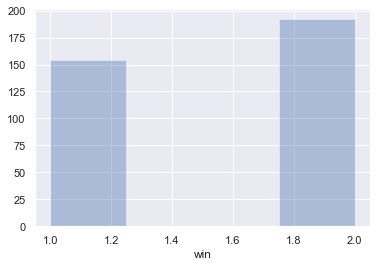

In [20]:
sns.distplot(data["win"],kde =False,)

Repartition des victoires

In [1]:
kill1=["kills_top_team_1","kills_jungle_team_1","kills_middle_team_1","kills_bottom_duo_carry_team_1","kills_bottom_duo_support_team_1"]
kill2=["kills_top_team_2","kills_jungle_team_2","kills_middle_team_2","kills_bottom_duo_carry_team_2","kills_bottom_duo_support_team_2"]


# OPTIMISATIONS

# TEST

In [35]:
i_train,i_test,t_train,t_test=train_test_split(input,target,test_size=0.2)
DTree= DecisionTreeClassifier()
DTree.fit(i_train,t_train)
print(DTree.score(i_test,t_test))


0.9571428571428572
